#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層2與池化層2

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [19]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)         

# 載入之前訓練的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history_acc(train_history, train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
def show_train_history_loss(train_history, train_loss, test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_loss', 'val_loss'], loc='upper left')
    plt.show()

In [25]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history_MSE=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)


Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 104s 3ms/step - loss: 0.0903 - accuracy: 0.0954 - val_loss: 0.0900 - val_accuracy: 0.0858
Epoch 2/12
37500/37500 [==============================] - 106s 3ms/step - loss: 0.0902 - accuracy: 0.0984 - val_loss: 0.0900 - val_accuracy: 0.1053
Epoch 3/12
37500/37500 [==============================] - 106s 3ms/step - loss: 0.0901 - accuracy: 0.0995 - val_loss: 0.0899 - val_accuracy: 0.1147
Epoch 4/12
37500/37500 [==============================] - 109s 3ms/step - loss: 0.0901 - accuracy: 0.1003 - val_loss: 0.0899 - val_accuracy: 0.1186
Epoch 5/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.0900 - accuracy: 0.1029 - val_loss: 0.0899 - val_accuracy: 0.1189
Epoch 6/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.0900 - accuracy: 0.1074 - val_loss: 0.0899 - val_accuracy: 0.1204
Epoch 7/12
37500/37500 [==============================] - 106

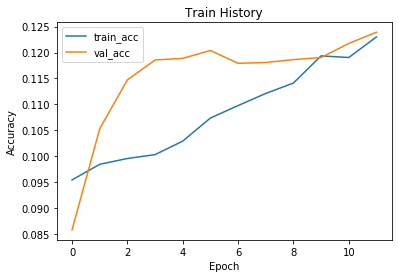

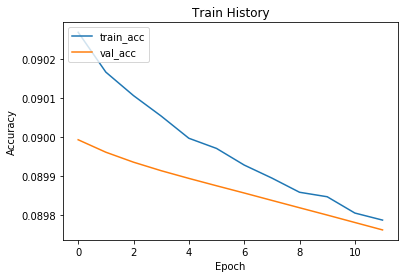

In [32]:
show_train_history_acc(train_history_MSE, 'accuracy', 'val_accuracy')
show_train_history_acc(train_history_MSE, 'loss', 'val_loss')

In [26]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history_BinaryCrossEntropy=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 103s 3ms/step - loss: 0.3235 - accuracy: 0.9000 - val_loss: 0.3232 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.3226 - accuracy: 0.9000 - val_loss: 0.3225 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 108s 3ms/step - loss: 0.3213 - accuracy: 0.9000 - val_loss: 0.3216 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 108s 3ms/step - loss: 0.3199 - accuracy: 0.9000 - val_loss: 0.3204 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 108s 3ms/step - loss: 0.3179 - accuracy: 0.9000 - val_loss: 0.3186 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.3152 - accuracy: 0.9000 - val_loss

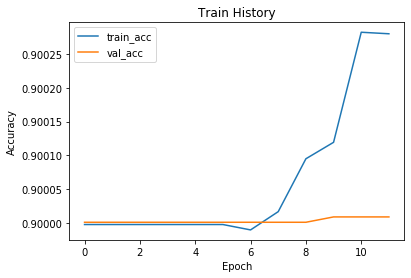

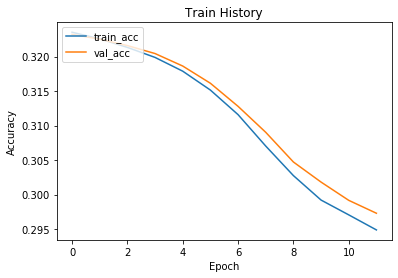

In [33]:
show_train_history_acc(train_history_BinaryCrossEntropy, 'accuracy', 'val_accuracy')
show_train_history_acc(train_history_BinaryCrossEntropy, 'loss', 'val_loss')